In [1]:
from fdh_gallica import Periodical, Search, Document
from fdh_gallica.parallel_process import iiif_urls_for_documents

from tqdm.autonotebook import tqdm

import json
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
%matplotlib inline

get all images with relevant query

In [3]:
re_execute = False
if re_execute:
    obj = Search(all_fields='atelier Nadar', dc_type='image', dc_creator='Atelier Nadar')
    obj.execute()
    print(f'number of fetched documents: {len(obj.documents)}')
    print(f'total records {obj.total_records}')
    print('retry fetching ...')
    obj.retry()
    print(f'number of fetched documents: {len(obj.documents)}')

    df = json_normalize(json.loads(json.dumps(obj.records)))
    print('save documents to local')
    # list handling becomes a pain of we save as csv
    df.to_pickle('raw_df.pkl')

In [4]:
df = pd.read_pickle('raw_df.pkl')

parse identifier for easier access:

In [5]:
image_dataframe = pd.DataFrame(df['dc:identifier']\
                               .map(lambda x: x[0] if type(x) == list else x))\
                               .rename(columns={'dc:identifier':'identifier'})

df['id'] = image_dataframe

In [6]:
df.head()

,dc:creator,dc:date,dc:description,dc:format,dc:identifier,dc:language,dc:publisher,dc:relation,dc:rights,dc:source,dc:subject,dc:title,dc:type,id
0,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531634...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits du théâtre -- 19e siècle,"Holda. Eldorado : [photographie, tirage de dém...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b53163492h
1,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531634...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits du théâtre -- 19e siècle,"Supra. Opéra : [photographie, tirage de démons...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b531634912
2,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531638...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits de studio -- 19e siècle,"Bébé Ullmann : [photographie, tirage de démons...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b531638493
3,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531649...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits collectifs -- 19e siècle,"Groupe de paysannes : [photographie, tirage de...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b53164917p
4,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531688...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits du théâtre -- 19e siècle,"Me Debaude : [photographie, tirage de démonstr...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b531688758


### useless dataframes

remove them for ease of use, next ones contain all the same content

In [7]:
df['dc:rights'].value_counts()

[domaine public, public domain]    23535
Name: dc:rights, dtype: int64

In [8]:
df['dc:type'].value_counts()

[image fixe, image, still image, photographie, photograph]    23535
Name: dc:type, dtype: int64

In [9]:
df['dc:language'].value_counts()

[fre, français]              23530
Sans contenu linguistique        5
Name: dc:language, dtype: int64

In [10]:
df['dc:format'].head()

0    [1 photogr. pos. sur papier albuminé : d'après...
1    [1 photogr. pos. sur papier albuminé : d'après...
2    [1 photogr. pos. sur papier albuminé : d'après...
3    [1 photogr. pos. sur papier albuminé : d'après...
4    [1 photogr. pos. sur papier albuminé : d'après...
Name: dc:format, dtype: object

In [11]:
df['dc:identifier'].head()

0    [https://gallica.bnf.fr/ark:/12148/btv1b531634...
1    [https://gallica.bnf.fr/ark:/12148/btv1b531634...
2    [https://gallica.bnf.fr/ark:/12148/btv1b531638...
3    [https://gallica.bnf.fr/ark:/12148/btv1b531649...
4    [https://gallica.bnf.fr/ark:/12148/btv1b531688...
Name: dc:identifier, dtype: object

In [12]:
df['dc:publisher'].value_counts()

(Paris)          1
Nadar (Paris)    1
Name: dc:publisher, dtype: int64

### removing them

In [13]:
del df['dc:type']
del df['dc:language']
del df['dc:format']
del df['dc:identifier']
del df['dc:rights']
del df['dc:publisher']

# getting information about subjects

In [14]:
#some objects are stored as list, others arent, use if else to handle
df['subject_is_list'] = df['dc:subject'].map(lambda x: type(x) == list)

In [15]:
df['len_list'] = df[df.subject_is_list]['dc:subject'].map(len)

length is non uniform ... we will have to unnest

In [16]:
df.len_list.value_counts()

2.0    12834
3.0      748
4.0      239
5.0      233
6.0       10
7.0        9
Name: len_list, dtype: int64

In [17]:
df[df.subject_is_list]['dc:subject'].map(lambda x: x).value_counts().head()

[Bernhardt, Sarah (1844-1923) -- Portraits, Portraits du théâtre -- 19e siècle]          266
[Réjane (1856-1920) -- Portraits, Portraits du théâtre -- 19e siècle]                    118
[Théo, Louise (1854-1922) -- Portraits, Portraits du théâtre -- 19e siècle]              109
[Simon-Girard, Juliette (1859-1959) -- Portraits, Portraits du théâtre -- 19e siècle]     84
[Lantelme, Marie -- Portraits, Portraits du théâtre -- 19e siècle]                        83
Name: dc:subject, dtype: int64

unnest list to get better view

In [18]:
to_unnest = df[df.subject_is_list]['dc:subject'].tolist()
to_unnest = df[df.subject_is_list][['dc:subject', 'id']].apply(lambda x: (x['dc:subject'], x.id), axis=1).tolist()
unnested = [(i, id_) for (list_, id_) in to_unnest for i in list_]

we will also need to use the title ...

In [19]:
df[~df.subject_is_list][['dc:subject', 'id', 'dc:title']].head()

,dc:subject,id,dc:title
0,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53163492h,"Holda. Eldorado : [photographie, tirage de dém..."
1,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531634912,"Supra. Opéra : [photographie, tirage de démons..."
2,Portraits de studio -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531638493,"Bébé Ullmann : [photographie, tirage de démons..."
3,Portraits collectifs -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53164917p,"Groupe de paysannes : [photographie, tirage de..."
4,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531688758,"Me Debaude : [photographie, tirage de démonstr..."


In [20]:
to_append = df[~df.subject_is_list][['dc:subject', 'id']].rename(columns={'dc:subject':'descriptor'})

In [21]:
unnested.__len__()

30156

In [22]:
subject_frame = pd.DataFrame(unnested, columns=['descriptor', 'id'])

In [23]:
subject_frame = pd.concat([subject_frame, to_append], sort=False)

In [24]:
subject_frame.count()

descriptor    39618
id            39618
dtype: int64

associate each descriptior of one object (given by id)

In [25]:
subject_frame.head()

,descriptor,id
0,"Auguez, Mathilde (1868-1955) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b53168872x
1,Portraits de studio -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53168872x
2,"Auguez, Mathilde (1868-1955) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b531688701
3,Portraits de studio -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531688701
4,"Bruant, Aristide (1851-1925) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b53171770j


do some keyword searching

In [26]:
subject_frame['19e'] = subject_frame.descriptor.map(lambda x: x[-len('-- 19e siècle'):] == '-- 19e siècle')
subject_frame['Portraits'] = subject_frame.descriptor.map(lambda x: 'portraits' in x.lower())

In [27]:
is_19e = subject_frame[subject_frame['19e']].id.unique()

In [28]:
subject_frame[subject_frame.Portraits].id.unique().__len__()

23239

In [29]:
portrait_ids = subject_frame[subject_frame.Portraits].id.unique()

dessin humoristiques & caricatures seams important

In [30]:
subject_frame[~subject_frame.id.isin(portrait_ids)].head()

,descriptor,id,19e,Portraits
98,"Offenbach, Jacques (1819-1880) -- Caricatures ...",https://gallica.bnf.fr/ark:/12148/btv1b53065466g,False,False
99,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53065466g,True,False
186,Clairville (1811-1879) -- Caricatures et dessi...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,False,False
187,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,True,False
194,"Crémieux, Adolphe (1796-1880) -- Caricatures e...",https://gallica.bnf.fr/ark:/12148/btv1b53065960p,False,False


we also get sculptures!

In [31]:
subject_frame[~subject_frame.id.isin(portrait_ids)].descriptor.value_counts().head()

Scènes théâtrales -- 19e siècle                        111
Sculpture de figures humaines                           57
Beer, Friedrich (1846-1912) -- Oeuvres -- Sculpture     53
Grévin, Alfred (1827-1892) -- Oeuvres -- Sculpture      53
Caricatures et dessins humoristiques -- 19e siècle      37
Name: descriptor, dtype: int64

In [32]:
subject_frame['caricature'] = subject_frame.descriptor.map(lambda x: 'Caricatures et dessins humoristiques' in x)

In [33]:
subject_frame[~subject_frame.id.isin(portrait_ids) & ~subject_frame.caricature].descriptor.value_counts().head()

Scènes théâtrales -- 19e siècle                        111
Sculpture de figures humaines                           57
Grévin, Alfred (1827-1892) -- Oeuvres -- Sculpture      53
Beer, Friedrich (1846-1912) -- Oeuvres -- Sculpture     53
Vues d'intérieur -- 19e siècle                          21
Name: descriptor, dtype: int64

## Extracting individual names:

In [34]:
import re

In [35]:
name = "Grévin, Alfred (1827-1892)"
name_2 = "Gobin (1982"
name_3 = 'Labounskaya, Marie -- Portraits'

In [36]:
def find_names(name):
    return re.findall('([\S]* [\S]* [\S]*|[\S]* [\S]*|[\S]*|[\S]*\, [\S]*[ \S*]+) \([\d]{2}', name)

def find_names_undated(name):
    return re.findall('([\S]*|[\S]*\, [\S]*[ \S*]+) -- Portraits', name)

In [37]:
find_names(name), find_names(name_2), find_names_undated(name_3)

(['Grévin, Alfred'], ['Gobin'], ['Labounskaya, Marie'])

In [38]:
subject_frame['subject_name'] = subject_frame.descriptor.map(find_names)

In [39]:
no_name = subject_frame.subject_name.map(len) == 0
subject_frame.loc[ no_name, 'subject_name'] = subject_frame[no_name].descriptor.map(find_names_undated)

In [40]:
no_name = subject_frame.subject_name.map(len) == 0

In [41]:
subject_frame[no_name]['descriptor'].drop_duplicates()

1                        Portraits de studio -- 19e siècle
9                       Portraits du théâtre -- 19e siècle
24                         Scènes théâtrales -- 19e siècle
45                              Cour et courtisans -- Iran
48                                 Portraits -- 19e siècle
53                                             Violonistes
64                                               Cyclistes
88                         Ambassadeurs japonais -- France
90                          Ambassadeurs chinois -- France
99       Caricatures et dessins humoristiques -- 19e si...
105                            Autoportraits -- 19e siècle
158                                                Ballons
182                    Portraits d'intérieur -- 19e siècle
244                                 Déguisements (costume)
262                                 Dessin -- Reproduction
263                         Vues d'intérieur -- 19e siècle
292                                                 Géan

In [42]:
named_subjects = subject_frame[subject_frame.subject_name.map(len) > 0].id.unique()

number of images we can find a name to:

In [43]:
len(named_subjects)

13387

# at most 1940

In [44]:
subject_frame[subject_frame.subject_name.map(len) > 0].subject_name.map(str).unique().__len__()

1937

In [45]:
subject_frame[subject_frame.subject_name.map(len) > 0].id.unique().__len__()

13387

In [46]:
subject_frame.loc[~no_name, 'named_subject'] = subject_frame[~no_name].subject_name.map(lambda x: x[0])

In [47]:
subject_frame.named_subject.value_counts().head()

Bernhardt, Sarah      424
Réjane                168
Théo, Louise          146
Mily-Meyer, Emilie    136
Brasseur, Albert      115
Name: named_subject, dtype: int64

In [48]:
#explore_names[explore_names.index.map(len) < 10]

In [49]:
subject_frame.named_subject.unique().__len__()

1938

In [50]:
(subject_frame.named_subject.value_counts() > 1).value_counts()

True     1416
False     521
Name: named_subject, dtype: int64

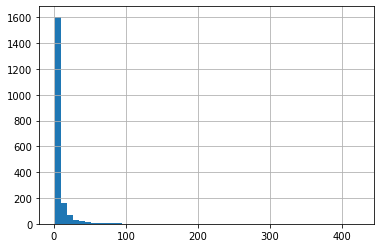

In [51]:
explore_names = subject_frame.named_subject.value_counts()
explore_names.hist(bins=50)

number of names we have:

In [52]:
subject_frame.named_subject.value_counts().count()

1937

how many resources does that correspond to:

In [53]:
id_identified = subject_frame[subject_frame.named_subject.notna()].id.unique()

# about half of the images belong to known person

In [54]:
subject_frame[subject_frame.named_subject.notna()].id.unique().__len__()

13387

In [55]:
len(set(subject_frame.id.unique())) # nbr unique ids

23535

a lot of them don't tell us the name in the source, but it can be found in the title

In [56]:
len(set(subject_frame.id.unique()).difference(set(id_identified)))

10148

In [57]:
subject_frame[~subject_frame.id.isin(named_subjects)].descriptor.value_counts().head(10)

Portraits du théâtre -- 19e siècle    6130
Portraits de studio -- 19e siècle     2513
Portraits -- 19e siècle               1278
Scènes théâtrales -- 19e siècle        212
Portraits collectifs -- 19e siècle     208
Costumes -- 19e siècle                  79
Lanvin (Maison de couture)              67
Danseuses                               67
Enfants                                 55
Tournée Brasseur                        44
Name: descriptor, dtype: int64

In [58]:
subject_frame[~subject_frame.id.isin(portrait_ids) & ~subject_frame.id.isin(named_subjects)].descriptor.value_counts().head()

Scènes théâtrales -- 19e siècle                     111
Représentations d'objet -- 19e siècle                17
Représentations animalières -- 19e siècle            12
Tableaux vivants et mises en scène -- 19e siècle     10
Tournée Brasseur                                      8
Name: descriptor, dtype: int64

In [59]:
subject_frame[~subject_frame.id.isin(portrait_ids)].head()

,descriptor,id,19e,Portraits,caricature,subject_name,named_subject
98,"Offenbach, Jacques (1819-1880) -- Caricatures ...",https://gallica.bnf.fr/ark:/12148/btv1b53065466g,False,False,True,"[Offenbach, Jacques]","Offenbach, Jacques"
99,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53065466g,True,False,True,[],NaN
186,Clairville (1811-1879) -- Caricatures et dessi...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,False,False,True,[Clairville],Clairville
187,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,True,False,True,[],NaN
194,"Crémieux, Adolphe (1796-1880) -- Caricatures e...",https://gallica.bnf.fr/ark:/12148/btv1b53065960p,False,False,True,"[Crémieux, Adolphe]","Crémieux, Adolphe"


In [60]:
df['dc:title'].map(lambda x: len(x) if type(x) == list else 1).value_counts()

1    23503
2       32
Name: dc:title, dtype: int64

In [61]:
df['nbr_title'] = df['dc:title'].map(lambda x: len(x) if type(x) == list else 1)

In [62]:
df[df.nbr_title == 1]['dc:title'].sample(10).tolist()

['Miss Potter [i.e. Potters]. Américaine. Actrice : [photographie, tirage de démonstration] / [Atelier Nadar]',
 "[Martial. Nouveautés. Le misanthrope et l'amour i.e. l'auvergnat] : [photographie, tirage de démonstration] / [Atelier Nadar]",
 'Calvé. Opéra-Comique. [Lalla-Roukh] : [photographie, tirage de démonstration] / [Atelier Nadar]',
 '[Savoyer] : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Modes Lanvin : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Arnoldson. Opéra-Comique. Le Barbier de Séville : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'M[lle] Sallard : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'M. Candé. (M[adame] Sans Gêne). Vaudeville : [photographie, tirage de démonstration] / [Atelier Nadar]',
 "[Portrait d'un homme] : [photographie, tirage de démonstration] / [Atelier Nadar]",
 'Vaillant et Vauthier : [photographie, tirage de démonstration] / [Atelier Nadar]']

In [63]:
def find_names_title(name):
    return [x.strip() for x in re.findall('([\S\s ^(\:)]*) \: ', name) if len(x.strip()) > 0]

In [64]:
def extract_from_brackets(name):
    return re.findall('\[([\w \-\,\.]*)\]', name)

In [65]:
def fix_bad_naming(name):
    return re.sub('[\[\]]*', '', name)

In [66]:
text_1 = 'Huguet. Folies-Dramatiques. La petite fronde : [photographie, tirage de démonstration] / [Atelier Nadar]'

In [67]:
text_2 = 'Armand.[lol] Châtelet : [photographie :,'

In [68]:
fix_bad_naming(text_2)

'Armand.lol Châtelet : photographie :,'

In [69]:
extract_from_brackets(text_1)

['photographie, tirage de démonstration', 'Atelier Nadar']

In [70]:
df[df.nbr_title == 1]['dc:title'].map(extract_from_brackets).value_counts().head()

[photographie, tirage de démonstration, Atelier Nadar]                                           14918
[lle, photographie, tirage de démonstration, Atelier Nadar]                                       1004
[me, photographie, tirage de démonstration, Atelier Nadar]                                         110
[Renaissance. En scène, mesdemoiselles, photographie, tirage de démonstration, Atelier Nadar]       51
[i.e. Lantelme, photographie, tirage de démonstration, Atelier Nadar]                               45
Name: dc:title, dtype: int64

In [71]:
df.loc[df.nbr_title == 1, 'first_title'] = df[df.nbr_title == 1]['dc:title'].map(find_names_title)

In [72]:
df.first_title.dropna().map(len).value_counts()

1    23502
0        1
Name: first_title, dtype: int64

In [73]:
df[df.first_title.map(lambda x: len(x)==0 if type(x) ==list else False)]['dc:title'].tolist()

['[Gabrielle Figuet / [Atelier Nadar]']

In [74]:
df.loc[df.first_title.notna(), 'first_title'] = df[
    df.first_title.notna()].first_title.map(
    lambda x: fix_bad_naming(x[0]) if len(x)>0  else x)#.value_counts()

In [75]:
df.count()

dc:creator         23535
dc:date            23535
dc:description       180
dc:relation        23535
dc:source          23535
dc:subject         23535
dc:title           23535
id                 23535
subject_is_list    23535
len_list           14073
nbr_title          23535
first_title        23503
dtype: int64

In [76]:
df = pd.merge(df, subject_frame[['id', 'named_subject']].dropna(), on='id', how='outer')

In [77]:
df.count()

dc:creator         24317
dc:date            24317
dc:description       187
dc:relation        24317
dc:source          24317
dc:subject         24317
dc:title           24317
id                 24317
subject_is_list    24317
len_list           14855
nbr_title          24317
first_title        24285
named_subject      14169
dtype: int64

In [78]:
df.loc[df.first_title.isna() & df['dc:title'].notna(), 'first_title'] = df[    df.first_title.isna( )& df['dc:title'].notna()]['dc:title'].map(lambda x: fix_bad_naming(find_names_title(x[0])[0])).tolist()

In [79]:
df[df.named_subject.isna()]['dc:subject'].value_counts().index.tolist().__len__()

113

In [80]:
df.named_subject.dropna().map(lambda x: 'Charlaviski' in x).value_counts()

False    14169
Name: named_subject, dtype: int64

In [81]:
df[df.first_title.notna() & df.named_subject.isna() & df['dc:subject'].map(lambda x: 'collectifs' in x)].first_title

3                                      Groupe de paysannes
24                     Groupe. Folies-Dramatiques. Juanita
103          Groupe de six acteurs. (Gaîté). "Le Talisman"
616                                   Société Colombophile
637                                              Pyrénéens
2247                      Groupe. En scène, mesdemoiselles
3054                       Rédaction du journal "Le Droit"
3305     Groupe. (Renaissance). "En scène, mesdemoiselles"
4217             Souris. Châtelet groupe d'enfants acteurs
5160     Mlles Barbier, Margueritte, Millia. Nouveau Ci...
6231                                  Congrès astronomique
6784                      Pons de Léon I. e. Ponce de Leon
7651                  Mis Pons de Léon i. e. Ponce de Leon
9013         Groupe. Renaissance. En scène, mesdemoiselles
9030                  Groupe. Renaissance. L'hôtel Godelot
10383       Groupe. (Renaissance). Les 12 femmes de Japhet
10390          Groupe petit Poucet. Gaîté. Le petit Pouc

## now that we have extracted names for most people, get years lived where available (from subject)

In [82]:
def get_years(string):
    x = re.findall('\(([\d{4}  -]+)\)', string)
    if len(x) == 0:
        return None
    return x[0]

def get_years_special(string):
    x = re.findall('\(([\d{4}\d{2}  -\.\?]+)[\S \;]*\)', string)
    if len(x) == 0:
        return None
    return x[0]

In [83]:
subject_frame['years'] = subject_frame.descriptor.map(get_years) 

In [84]:
get_years_special('Febvre, Paul (18..-1928)')

'18..-1928'

41 for which we can't find perfect match

In [85]:
unmatched = subject_frame.years.isna() & subject_frame.descriptor.map(lambda x: '(1' in x)
subject_frame[unmatched].count()

descriptor       3157
id               3157
19e              3157
Portraits        3157
caricature       3157
subject_name     3157
named_subject    3157
years               0
dtype: int64

In [86]:
subject_frame[unmatched].descriptor

12              Decroza, Francine (1868-19..) -- Portraits
23              Decroza, Francine (1868-19..) -- Portraits
26              Decroza, Francine (1868-19..) -- Portraits
34               Dauville, Louise (18..-19..) -- Portraits
44       Nâser ed-Din (1831-1896 ; shah d'Iran) -- Port...
49       Gélabert, Conchita, Marie (1858-19.. ; actrice...
55       Nâser ed-Din (1831-1896 ; shah d'Iran) -- Port...
67               Armand, Victorin (18..-1896) -- Portraits
68                         Bellot (18..-19..) -- Portraits
74       Nâser ed-Din (1831-1896 ; shah d'Iran) -- Port...
84       Joséphine (1763-1814 ; impératrice des Françai...
308                 Kelm, Joseph (1802?-1882) -- Portraits
310                 Kelm, Joseph (1802?-1882) -- Portraits
312                 Kelm, Joseph (1802?-1882) -- Portraits
316                 Kelm, Joseph (1802?-1882) -- Portraits
318                 Kelm, Joseph (1802?-1882) -- Portraits
322                        Angèle (18..-19..) -- Portrai

In [87]:
subject_frame.loc[unmatched, 'years'] = subject_frame[unmatched].descriptor.map(get_years_special)

In [88]:
subject_frame[subject_frame.years.notna()].id.unique().__len__()

13040

In [89]:
id_years = subject_frame[subject_frame.years.notna()].id.unique()

In [90]:
df = pd.merge(df, subject_frame[['id', 'years']].dropna(), on='id', how='outer')

we never have more than one named individual ... it seems

In [91]:
(df.groupby(id).named_subject.count() > 1).value_counts()

False    26036
Name: named_subject, dtype: int64

# we can't get year or name of subject, who are we looking at

In [92]:
df[df.named_subject.isna() | df.years.isna()].count()

dc:creator         10495
dc:date            10495
dc:description       140
dc:relation        10495
dc:source          10495
dc:subject         10495
dc:title           10495
id                 10495
subject_is_list    10495
len_list            1041
nbr_title          10495
first_title        10495
named_subject        347
years                  0
dtype: int64

In [93]:
df[
    df.named_subject.isna() |\
    df.years.isna() &\
    df['dc:subject'].map(lambda x: 'Portraits de studio -- 19e siècle' in x) &\
    ~df['dc:subject'].map(lambda x: 'Théâtre' in x)
]['dc:title'].value_counts().sample(10)

Danseuse. [La Gaîté. Surcouf] : [photographie, tirage de démonstration] / [Atelier Nadar]                             6
[Adrienne] : [photographie, tirage de démonstration] / [Atelier Nadar]                                                1
Darienne. Scala. Revue : [photographie, tirage de démonstration] / [Atelier Nadar]                                    2
Me Largini. (Folies-Dramatiques) : [photographie, tirage de démonstration] / [Atelier Nadar]                          2
Poule aux oeufs d'or. (Groupe). Folies Bergère : [photographie, tirage de démonstration] / [Atelier Nadar]            1
Comte de Boissy : [photographie, tirage de démonstration] / [Atelier Nadar]                                           1
Christine Berthier. Châtelet. Coco fêlé : [photographie, tirage de démonstration] / [Atelier Nadar]                   2
De Guerville. [Folies-Dramatiques]. Riquet à la houppe : [photographie, tirage de démonstration] / [Atelier Nadar]    1
Mlle Paula Dheurs. Odéon : [photographie

In [94]:
matches = df['dc:title'].map(lambda x: re.match('(?!\:)([\s\S]*) :', str(x)))

In [95]:
df[matches.isna()]['dc:title']

24782    [Gabrielle Figuet / [Atelier Nadar]
Name: dc:title, dtype: object

In [96]:
matches.dropna().map(lambda x: re.sub('\[|\]|\:', '', x.group(0))).value_counts().head(100).index.tolist()

['Statuettes Grévin ',
 'Rosa, Josepha ',
 'Groupes Théodora. Sarah Bernhardt et M. Laurent. Porte St Martin ',
 'Groupes Théodora. Porte St-Martin. Sarah Bernhardt et M. Laurent ',
 'Sarah Bernhardt. Porte Saint-Martin. La Tosca ',
 'Portrait composite des frères Reclus ',
 'Ghinassi ',
 'Groupe Poucet Albert, Duhamel, Christian, Scipion. Gaîté. Petit Poucet ',
 "Sarah Bernhardt. Porte Saint-Martin. Jeanne d'Arc ",
 'Chevreul père et fils, Nadar ',
 'H. Petit et Angelo. Ambigu. "Assommoir" ',
 'Depoix et Larcher. Menus Plaisirs. "Ma femme manque de chic" ',
 'Me Debriège ',
 'Mary Anderson. Anglaise ',
 'Febvre et Reichemberg i.e. Reichenberg. Français "L\'Ami Fritz" ',
 'Sarah et Berton. Porte Saint-Martin. La Tosca ',
 'Sarah Bernhardt ',
 'Granier, Vauthier. Gaîté. Orphée aux enfers ',
 'Deval et Max et Sarah Bernhardt. (Renaissance). "Gismonda" ',
 'Marie-Thérèse ',
 'Mme Méaly et M. Fugère. (Gaîté). Le Talisman ',
 'Réjane ',
 'Chevreul, Nadar ',
 'H. Petit et Gil Naza. Ambigu. "

In [97]:
def find_keywords(x):
    
    if not x:
        return x
    x = str(x)
    l = re.findall('(?!\d)[\w]*', x) # take all words, exclude years
    l = list(set([word for word in l if len(word) > 0])) # drop duplicates in one entry
    return l

In [98]:
tag_list = pd.Series([x for i in df['dc:subject'].map(find_keywords).tolist() for x in i]).value_counts().reset_index()

In [99]:
tag_list_title = pd.Series([x for i in df['dc:title'].map(find_keywords).tolist() for x in i]).value_counts().reset_index()

In [100]:
tag_list_title[tag_list_title['index'].map(lambda x: x.islower() and len(x) > 2)]['index'].head(30).tolist()

['photographie',
 'tirage',
 'démonstration',
 'lle',
 'aux',
 'fils',
 'femme',
 'des',
 'dans',
 'comique',
 'père',
 'dramatiques',
 'voyage',
 'une',
 'non',
 'général',
 'homme',
 'année',
 'scène',
 'mesdemoiselles',
 'peintre',
 'dramatique',
 'femmes',
 'cloches',
 'enfers',
 'lune',
 'rouge',
 'journaliste',
 'frères',
 'petite']

In [101]:
tag_list[tag_list['index'].map(lambda x: x.islower() and len(x) > 2)]['index'].tolist()

['siècle',
 'théâtre',
 'studio',
 'théâtrales',
 'collectifs',
 'actrice',
 'acteur',
 'lyrique',
 'artiste',
 'figures',
 'humaines',
 'siamois',
 'danseuse',
 'couture',
 'roi',
 'cantatrice',
 'humoristiques',
 'dessins',
 'chanteur',
 'japonais',
 'intérieur',
 'des',
 'empereur',
 'duc',
 'prince',
 'lieux',
 'familiers',
 'shah',
 'acteurs',
 'courtisans',
 'objet',
 'comte',
 'personnage',
 'animalières',
 'chanteuse',
 'historiques',
 'fictif',
 'russe',
 'franco',
 'marquis',
 'grand',
 'décès',
 'frères',
 'après',
 'vivants',
 'militaires',
 'scène',
 'mises',
 'directeur',
 'cirque',
 'ténor',
 'homme',
 'dessinateur',
 'orientale',
 'lithographe',
 'architecture',
 'français',
 'domestique',
 'baron',
 'dramatique',
 'équestres',
 'shows',
 'ballon',
 'princesse',
 'artistes',
 'jeunesse',
 'aéronaute',
 'portée',
 'ebyšev',
 'uruguayens',
 'van',
 'travestis',
 'duchesse',
 'amiral',
 'légendaire',
 'médecin',
 'air',
 'italien',
 'arts',
 'portugais',
 'photographiques'

### associate tags and ids in new dataframe. Remove useless tags. save tag-id association as json file

In [102]:
# clear useless tags 

from itertools import compress


def tag_exclude(tag):
    
    result = False
    if len(tag) < 3:
        result = False
    elif len(tag) == 3:
        if tag.islower() and tag != 'roi':
            result = False
        else:
            result = True
    else:
        # this list may change
        if tag in  ['siècle', 'Portraits', 'studio', 'Scènes', 'collectifs', 'photographie', 'Nadar']:
            result = False
        else:
            result = True
    return result

def tag_list_exclude(tag_list):
    mask = list(map(tag_exclude, tag_list))
    return list(compress(tag_list, mask))

In [103]:
tag_frame = pd.DataFrame(df.id)
tag_frame['tags'] = df['dc:subject'].map(find_keywords) + df['dc:title'].map(find_keywords)
tag_frame['tags'] = tag_frame['tags'].apply(lambda x: list(set(x)))
tag_frame['tags'] = tag_frame.tags.apply(tag_list_exclude)

In [104]:
tag_explode = tag_frame.tags.apply(pd.Series) \
            .merge(tag_frame, right_index=True, left_index=True) \
            .drop(['tags'],axis=1) \
            .melt(id_vars=['id'], value_name='tag') \
            .drop('variable', axis=1) \

In [105]:
tag_ids = tag_explode.groupby(tag_explode.tag)['id'].unique().apply(list)

In [106]:
tag_ids.to_json('tag_ids.json')

### there really is no associated year

In [107]:
subject_frame[~subject_frame.id.isin(id_years) &\
              subject_frame.named_subject.isna() &\
              ~subject_frame.Portraits].descriptor.value_counts().index

Index(['Scènes théâtrales -- 19e siècle', 'Costumes -- 19e siècle',
       'Danseuses', 'Lanvin (Maison de couture)', 'Enfants',
       'Tournée Brasseur', 'Ambassadeurs japonais -- France', 'Trapézistes',
       'Représentations d'objet -- 19e siècle', 'Cour et courtisans -- Iran',
       'Clowns', 'Cavalières', 'Travestis',
       'Représentations animalières -- 19e siècle', 'Violonistes',
       'Nourrissons', 'Singes', 'Bicyclettes',
       'Tableaux vivants et mises en scène -- 19e siècle', 'Enfants acteurs',
       'Géants', 'Ballons -- France -- 19e siècle',
       'Vues d'intérieur -- 19e siècle', 'Costumes', 'Danse orientale',
       'Mandoline', 'Chat domestique', 'Animaux de cirque',
       'Bicyclettes -- Au théâtre', 'Journaux français',
       'Pierrot (personnage fictif)', 'Géant (ballon)', 'Chien',
       'Minstrel shows', 'Escrimeurs', 'Âne', 'Religieux',
       'Représentations animalières -- 1870-1913', 'Haltérophiles',
       'Indiens d'Amérique', 'Statues', 'Hamlet

In [108]:
df[df.first_title.notna() & df.named_subject.notna()][['first_title', 'named_subject']]

,first_title,named_subject
7,Me Auguez,"Auguez, Mathilde"
8,Me Auguez,"Auguez, Mathilde"
9,M. Bruant,"Bruant, Aristide"
10,Me Auguez,"Auguez, Mathilde"
13,M. A. Brasseur,"Brasseur, Albert"
14,Me Auguez. (Opéra-Comique),"Auguez, Mathilde"
19,"Me Decroza. Renaissance. En scène, mesdemoiselles","Decroza, Francine"
22,Me Auguez,"Auguez, Mathilde"
30,"Me Lender. (Variétés). ""Pincés""","Lender, Marcelle"
31,Me Lender. Variétés. Pincés,"Lender, Marcelle"


In [109]:
df[df.first_title.notna() & df.named_subject.notna()].named_subject.value_counts()

Bernhardt, Sarah                     496
Réjane                               186
Mily-Meyer, Emilie                   171
Théo, Louise                         150
Brasseur, Albert                     142
Gélabert, Conchita, Marie            130
Granier, Jeanne                      128
Simon-Girard, Juliette               114
Grévin, Alfred                       113
Beer, Friedrich                      106
Mary-Albert, Madame                  105
Capoul, Victor                       104
Fugère, Lucien                       100
Reichenberg, Suzanne                  97
Chevreul, Eugène                      96
Decroza, Francine                     95
Leriche, Augustine                    95
Vauthier, Eugène                      92
Arnoldson, Sigrid                     91
Nadar                                 90
Montbazon, Marie                      90
Laurent, Marie                        88
Ugalde, Marguerite                    88
Lantelme, Marie                       88
Petit, Hélène   

In [110]:
df[df.first_title.notna() & df.named_subject.notna()].named_subject.count()

15888

In [111]:
df[df.first_title.notna() & df.named_subject.isna()].first_title.value_counts().head(30).index.tolist()

['Ghinassi',
 'Marie-Thérèse',
 'Ambassade japonaise',
 'Modes Lanvin',
 'Marie-Thérèse. Variétés',
 'Gabrielle',
 "Portrait d'une femme",
 "Portrait d'une femme non identifiée",
 "Portrait d'un homme",
 'Andrée Dalti',
 'Jaeger',
 'Me Cernay',
 'Soukaret. 1er prix de beauté de Spa',
 'Loetitia. Châtelet. "La queue du chat"',
 'Mme Prelly. Folies dramatiques',
 'Modes. Lanvin',
 'Potter i.e. Potters',
 'Mlle Engalli',
 'Me Demoreuil',
 'Laurence',
 'Me Rivolta',
 'Lhéry',
 'Engally. Opéra comique',
 'Me de Nory',
 'Mlle Stuart',
 'Paulette',
 'Me de Breuil',
 'Mlle Gabrielle',
 'Beaumaine. Variétés',
 'Jaeger. Eden']